# Statistiques descriptives 

- compter le nombre de tweets par semaine
- nombre de likes moyens
- taux d'engagement
- indice

In [13]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

## 1. Nombre de tweets par semaine

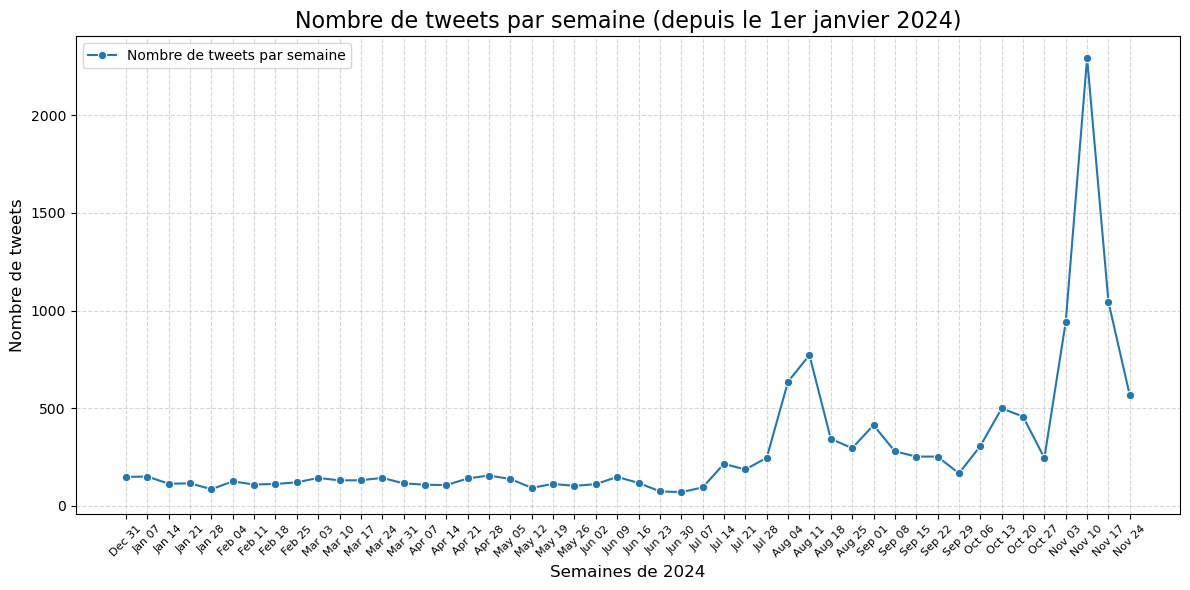

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données filtrées avec YearWeek
df = pd.read_excel('/home/onyxia/work/Scrapping_tweets/Scrapping_tweets/tweets_fusionnes.xlsx')

# Grouper par semaine et compter les tweets
tweets_per_week = df.groupby('YearWeek').size().reset_index(name='TweetCount')

# Convertir YearWeek en dates réelles (début de semaine)
tweets_per_week['Date'] = pd.to_datetime(tweets_per_week['YearWeek'] + '-0', format='%Y-%U-%w')

# Tracer le graphique avec Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=tweets_per_week, x='Date', y='TweetCount', marker='o', label='Nombre de tweets par semaine')

# Personnalisation
plt.title('Nombre de tweets par semaine (depuis le 1er janvier 2024)', fontsize=16)
plt.xlabel('Semaines de 2024', fontsize=12)
plt.ylabel('Nombre de tweets', fontsize=12)
plt.xticks(tweets_per_week['Date'], tweets_per_week['Date'].dt.strftime('%b %d'), rotation=45, fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()

# Afficher le graphique
plt.show()


## 2. likes

Evolution des nombres de likes, vues, retweets et commentaires.

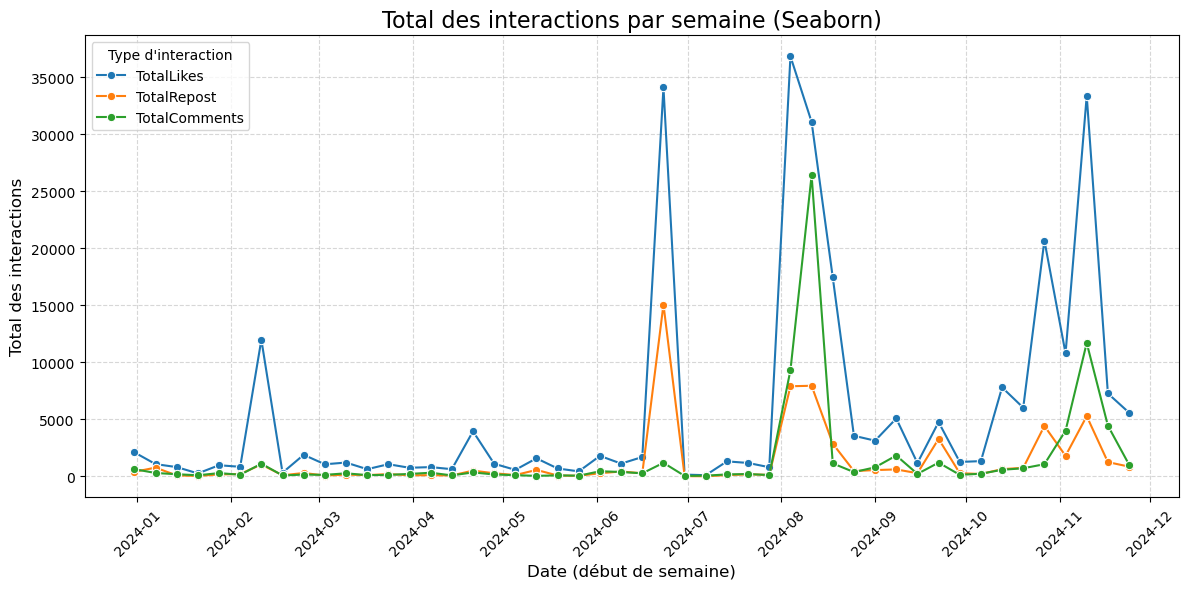

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données filtrées avec YearWeek, Likes, Views, Repost, Comments
df = pd.read_excel('/home/onyxia/work/Scrapping_tweets/Scrapping_tweets/tweets_fusionnes.xlsx')

# Vérifiez que les colonnes nécessaires existent
if not {'Likes', 'Views', 'Repost', 'Comments', 'YearWeek'}.issubset(df.columns):
    raise ValueError("Le fichier doit contenir les colonnes 'Likes', 'Views', 'Repost', 'Comments', 'YearWeek'")

# Grouper par semaine
weekly_stats = df.groupby('YearWeek').agg(
    TotalLikes=('Likes', 'sum'),
    TotalRepost=('Repost', 'sum'),
    TotalComments=('Comments', 'sum'),
    NombreTweets=('YearWeek', 'size')
).reset_index()

# Convertir YearWeek en dates réelles (début de semaine)
weekly_stats['Date'] = pd.to_datetime(weekly_stats['YearWeek'] + '-0', format='%Y-%U-%w')

# Mettre les données au format "long" pour faciliter les graphiques avec Seaborn
long_format = weekly_stats.melt(id_vars=['Date'], 
                                value_vars=['TotalLikes', 'TotalRepost', 'TotalComments'], 
                                var_name='Interaction', 
                                value_name='Valeur')

# Graphique Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=long_format, x='Date', y='Valeur', hue='Interaction', marker='o')

# Personnalisation
plt.title('Total des interactions par semaine (Seaborn)', fontsize=16)
plt.xlabel('Date (début de semaine)', fontsize=12)
plt.ylabel('Total des interactions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Type d\'interaction')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Afficher le graphique
plt.show()


/tmp/ipykernel_197213/1308682131.py:53: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.



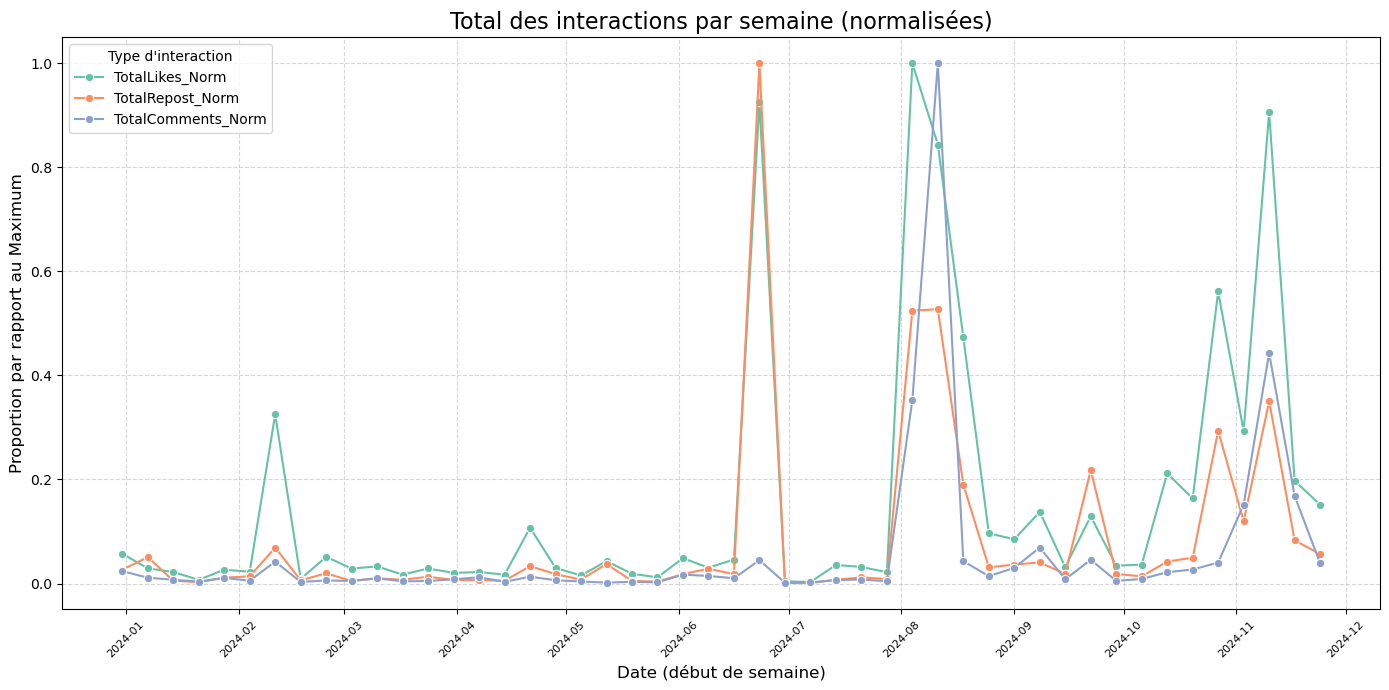

/tmp/ipykernel_197213/1308682131.py:72: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.



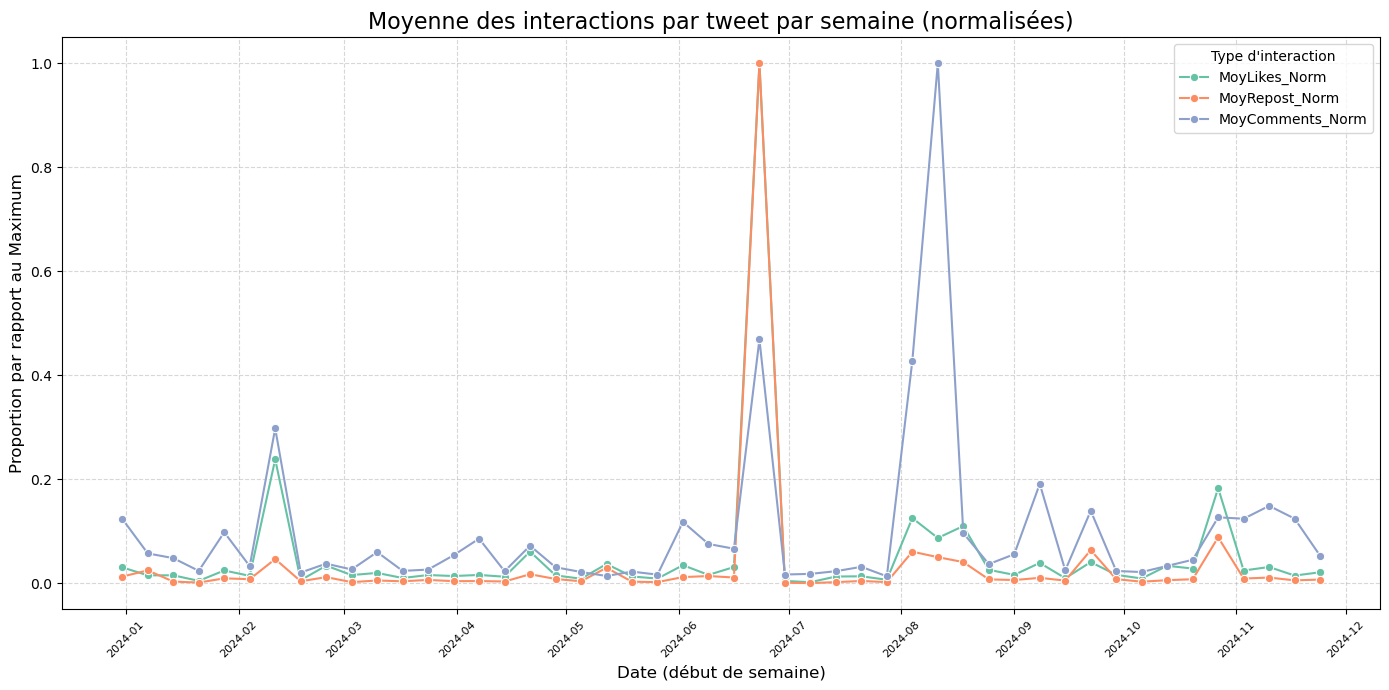

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_excel('/home/onyxia/work/Scrapping_tweets/Scrapping_tweets/tweets_fusionnes.xlsx')

# Vérifiez que les colonnes nécessaires existent
if not {'Likes', 'Views', 'Repost', 'Comments', 'YearWeek'}.issubset(df.columns):
    raise ValueError("Le fichier doit contenir les colonnes 'Likes', 'Views', 'Repost', 'Comments', 'YearWeek'")

# Grouper par semaine
weekly_stats = df.groupby('YearWeek').agg(
    TotalLikes=('Likes', 'sum'),
    TotalRepost=('Repost', 'sum'),
    TotalComments=('Comments', 'sum'),
    NombreTweets=('YearWeek', 'size')
)

# Calcul des moyennes pondérées
weekly_stats['MoyLikes'] = weekly_stats['TotalLikes'] / weekly_stats['NombreTweets']
weekly_stats['MoyRepost'] = weekly_stats['TotalRepost'] / weekly_stats['NombreTweets']
weekly_stats['MoyComments'] = weekly_stats['TotalComments'] / weekly_stats['NombreTweets']

# Convertir YearWeek en dates réelles (début de semaine)
weekly_stats['Date'] = pd.to_datetime(weekly_stats.index + '-0', format='%Y-%U-%w')

# Normaliser les données par rapport au maximum de chaque colonne
columns_to_normalize = ['TotalLikes', 'TotalRepost', 'TotalComments', 'MoyLikes', 'MoyRepost', 'MoyComments']
for col in columns_to_normalize:
    weekly_stats[col + '_Norm'] = weekly_stats[col] / weekly_stats[col].max()

# Mettre les données au format "long" pour Seaborn
long_format_totals = weekly_stats.melt(
    id_vars=['Date'], 
    value_vars=['TotalLikes_Norm', 'TotalRepost_Norm', 'TotalComments_Norm'], 
    var_name='Type d\'interaction', 
    value_name='Valeur Normalisée'
)

long_format_means = weekly_stats.melt(
    id_vars=['Date'], 
    value_vars=['MoyLikes_Norm', 'MoyRepost_Norm', 'MoyComments_Norm'], 
    var_name='Type d\'interaction', 
    value_name='Valeur Normalisée'
)

# Palette de couleurs
palette = sns.color_palette("Set2")

# Graphique : Total des interactions par semaine (normalisées) avec courbes
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=long_format_totals, 
    x='Date', 
    y='Valeur Normalisée', 
    hue='Type d\'interaction', 
    palette=palette,
    marker='o'
)
plt.title('Total des interactions par semaine (normalisées)', fontsize=16)
plt.xlabel('Date (début de semaine)', fontsize=12)
plt.ylabel('Proportion par rapport au Maximum', fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.legend(title='Type d\'interaction')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Graphique : Moyenne des interactions par tweet par semaine (normalisées) avec courbes
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=long_format_means, 
    x='Date', 
    y='Valeur Normalisée', 
    hue='Type d\'interaction', 
    palette=palette,
    marker='o'
)
plt.title('Moyenne des interactions par tweet par semaine (normalisées)', fontsize=16)
plt.xlabel('Date (début de semaine)', fontsize=12)
plt.ylabel('Proportion par rapport au Maximum', fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.legend(title='Type d\'interaction')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


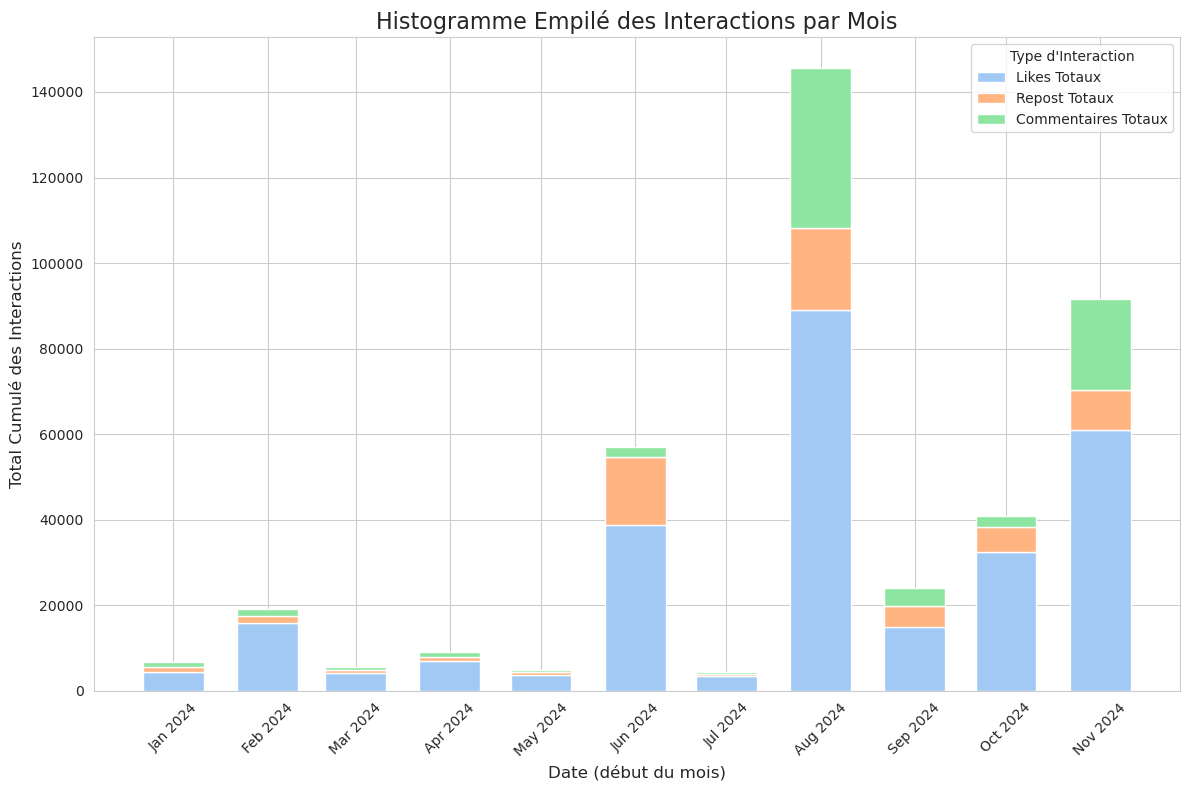

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
dfmois = pd.read_excel('/home/onyxia/work/Scrapping_tweets/Scrapping_tweets/tweets_fusionnes.xlsx')

# Vérifiez que les colonnes nécessaires existent
if not {'Likes', 'Views', 'Repost', 'Comments', 'ConvertedDate'}.issubset(dfmois.columns):
    raise ValueError("Le fichier doit contenir les colonnes 'Likes', 'Views', 'Repost', 'Comments', et 'ConvertedDate'")

# Ajouter une colonne YearMonth
dfmois['YearMonth'] = dfmois['ConvertedDate'].dt.strftime('%Y-%m')

# Grouper par mois
monthly_stats = dfmois.groupby('YearMonth').agg(
    TotalLikes=('Likes', 'sum'),
    TotalRepost=('Repost', 'sum'),
    TotalComments=('Comments', 'sum'),
)

# Convertir YearMonth en date réelle (début de mois)
monthly_stats['Date'] = pd.to_datetime(monthly_stats.index + '-01', format='%Y-%m-%d')

# Initialisation des données pour l'histogramme empilé
dates = monthly_stats['Date']
likes = monthly_stats['TotalLikes']
reposts = monthly_stats['TotalRepost']
comments = monthly_stats['TotalComments']

# Configuration du style Seaborn
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Largeur des barres
bar_width = 20  # en jours, pour ajuster la largeur des barres

# Création de l'histogramme empilé
plt.figure(figsize=(12, 8))
plt.bar(dates, likes, width=bar_width, color=palette[0], label='Likes Totaux')
plt.bar(dates, reposts, width=bar_width, bottom=likes, color=palette[1], label='Repost Totaux')
plt.bar(dates, comments, width=bar_width, bottom=likes + reposts, color=palette[2], label='Commentaires Totaux')

# Personnalisation du graphique
plt.title('Histogramme Empilé des Interactions par Mois', fontsize=16)
plt.xlabel('Date (début du mois)', fontsize=12)
plt.ylabel('Total Cumulé des Interactions', fontsize=12)
plt.xticks(dates, dates.dt.strftime('%b %Y'), rotation=45)  # Correction ici pour strftime
plt.legend(title='Type d\'Interaction')
plt.tight_layout()

# Afficher le graphique
plt.show()


/tmp/ipykernel_197213/3272373946.py:48: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



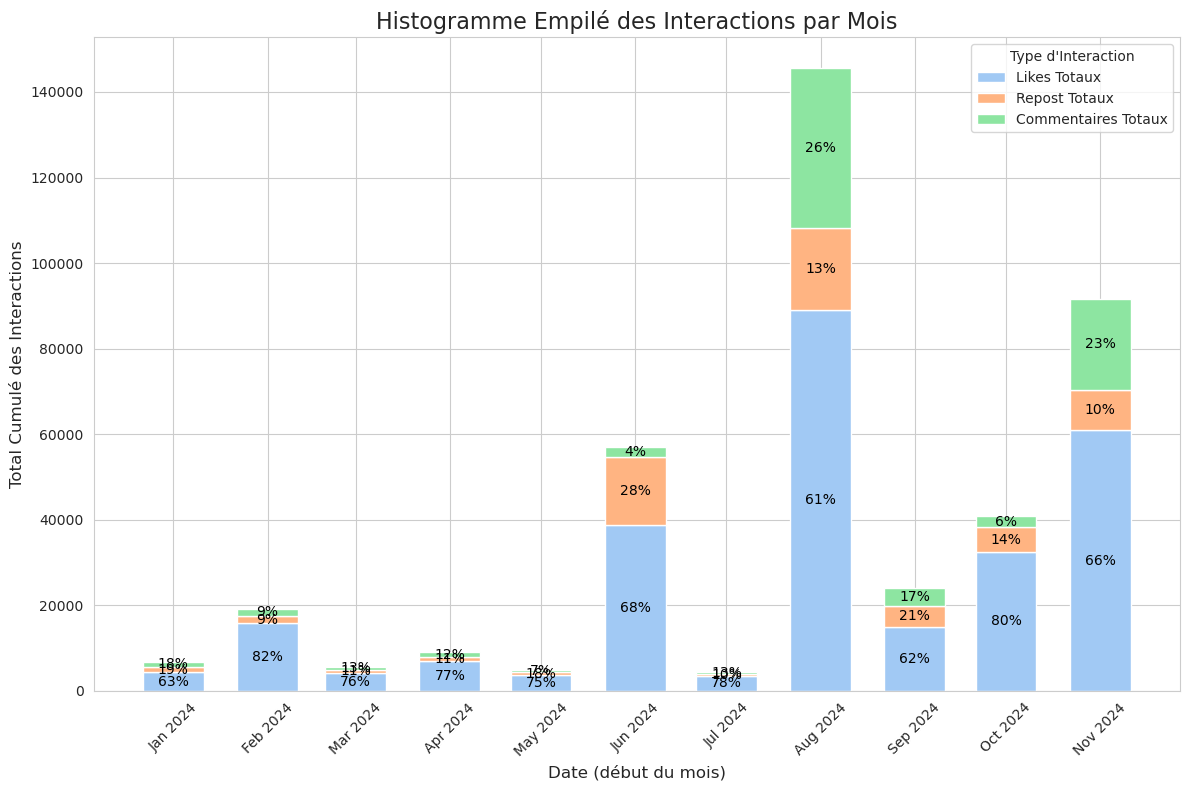

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
dfmois = pd.read_excel('/home/onyxia/work/Scrapping_tweets/Scrapping_tweets/tweets_fusionnes.xlsx')

# Vérifiez que les colonnes nécessaires existent
if not {'Likes', 'Views', 'Repost', 'Comments', 'ConvertedDate'}.issubset(dfmois.columns):
    raise ValueError("Le fichier doit contenir les colonnes 'Likes', 'Views', 'Repost', 'Comments', et 'ConvertedDate'")

# Ajouter une colonne YearMonth
dfmois['YearMonth'] = dfmois['ConvertedDate'].dt.strftime('%Y-%m')

# Grouper par mois
monthly_stats = dfmois.groupby('YearMonth').agg(
    TotalLikes=('Likes', 'sum'),
    TotalRepost=('Repost', 'sum'),
    TotalComments=('Comments', 'sum'),
)

# Convertir YearMonth en date réelle (début de mois)
monthly_stats['Date'] = pd.to_datetime(monthly_stats.index + '-01', format='%Y-%m-%d')

# Initialisation des données pour l'histogramme empilé
dates = monthly_stats['Date']
likes = monthly_stats['TotalLikes']
reposts = monthly_stats['TotalRepost']
comments = monthly_stats['TotalComments']
total = likes + reposts + comments  # Total cumulé pour chaque mois

# Configuration du style Seaborn
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Largeur des barres
bar_width = 20  # Ajuster la largeur des barres

# Création de l'histogramme empilé
plt.figure(figsize=(12, 8))
bars1 = plt.bar(dates, likes, width=bar_width, color=palette[0], label='Likes Totaux')
bars2 = plt.bar(dates, reposts, width=bar_width, bottom=likes, color=palette[1], label='Repost Totaux')
bars3 = plt.bar(dates, comments, width=bar_width, bottom=likes + reposts, color=palette[2], label='Commentaires Totaux')

# Ajouter les pourcentages sur les barres
for i, (like, repost, comment, tot) in enumerate(zip(likes, reposts, comments, total)):
    # Coordonnées x pour chaque barre
    x_coord = dates[i]
    
    # Afficher les pourcentages
    plt.text(x_coord, like / 2, f'{like / tot:.0%}', ha='center', va='center', fontsize=10, color='black')  # Pour Likes
    plt.text(x_coord, like + repost / 2, f'{repost / tot:.0%}', ha='center', va='center', fontsize=10, color='black')  # Pour Reposts
    plt.text(x_coord, like + repost + comment / 2, f'{comment / tot:.0%}', ha='center', va='center', fontsize=10, color='black')  # Pour Comments

# Personnalisation du graphique
plt.title('Histogramme Empilé des Interactions par Mois', fontsize=16)
plt.xlabel('Date (début du mois)', fontsize=12)
plt.ylabel('Total Cumulé des Interactions', fontsize=12)
plt.xticks(dates, dates.dt.strftime('%b %Y'), rotation=45)
plt.legend(title='Type d\'Interaction')
plt.tight_layout()

# Afficher le graphique
plt.show()


## 3. Création d'indices

### 3.1. Taux d'engagement

In [ ]:
#REMPLACER YEARWEEK PAR YEARMONTH SI RESULTATS VOULUS

import pandas as pd
import matplotlib.pyplot as plt

# Charger les données initiales
df = pd.read_excel('tweets_fusionnes.xlsx')

def calculate_engagement(df):
    """
    Calculer le taux d'engagement pour chaque ligne.
    """
    if not {'Likes', 'Views'}.issubset(df.columns):
        raise ValueError("Les colonnes 'Likes' et 'Views' sont nécessaires pour calculer le taux d'engagement.")

    # Ajouter la colonne 'Taux_Engagement'
    df['Taux_Engagement'] = ((df['Likes'] + df.get('Comments', 0) + df.get('Repost', 0)) / df['Views']) * 100
    print("Taux d'engagement calculé et ajouté au DataFrame.")
    return df

def calculate_weekly_stats(df):
    """
    Calculer les totaux par semaine, la croissance des likes, et le taux d'engagement moyen.
    """
    if 'YearWeek' not in df.columns:
        raise ValueError("La colonne 'YearWeek' est nécessaire pour calculer les statistiques hebdomadaires.")

    # Grouper par semaine et calculer les totaux
    weekly_stats = df.groupby('YearMonth').agg(
        TotalLikes=('Likes', 'sum'),
        TotalViews=('Views', 'sum'),
        NombreTweets=('YearMonth', 'size'),
        TotalEngagement=('Taux_Engagement', 'mean')  # Engagement moyen par semaine
    ).reset_index()  # Réinitialiser l'index pour un DataFrame propre

    # Ajouter la croissance des likes
    weekly_stats['CroissanceLikes'] = weekly_stats['TotalLikes'].pct_change() * 100
    return weekly_stats

# Étape 1 : Calculer le taux d'engagement
df_engagement = calculate_engagement(df)

# Étape 2 : Calculer les statistiques hebdomadaires
weekly_stats = calculate_weekly_stats(df_engagement)

# Étape 3 : Créer un graphique combiné
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graphique du nombre de tweets (axe principal)
ax1.bar(weekly_stats['YearMonth'], weekly_stats['NombreTweets'], color='skyblue', alpha=0.7, label='Nombre de Tweets')
ax1.set_xlabel('Semaine (YearMonth)', fontsize=12)
ax1.set_ylabel('Nombre de Tweets', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Ajouter le deuxième axe pour le taux d'engagement moyen
ax2 = ax1.twinx()
ax2.plot(weekly_stats['YearMonth'], weekly_stats['TotalEngagement'], color='green', marker='o', label='Taux d\'Engagement (%)', linestyle='--')
ax2.set_ylabel('Taux d\'Engagement (%)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Ajouter le troisième axe pour la croissance hebdomadaire des likes
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Déplacer le troisième axe légèrement vers la droite
ax3.plot(weekly_stats['YearMonth'], weekly_stats['CroissanceLikes'], color='red', marker='s', label='Croissance des Likes (%)', linestyle=':')
ax3.set_ylabel('Croissance des Likes (%)', fontsize=12, color='red')
ax3.tick_params(axis='y', labelcolor='red')
ax3.legend(loc='lower right')

#axe 4 rajout de ma part éventuellement supprimer
ax4 = ax1.twinx()
ax4.plot(weekly_stats['YearMonth'], weekly_stats['TotalViews'], color='purple', marker='o', label='Taux d\'Engagement (%)', linestyle='--')
ax4.set_ylabel('Taux d\'Engagement (%)', fontsize=12, color='green')
ax4.tick_params(axis='y', labelcolor='purple')
ax4.legend(loc='upper right')

# Ajouter un titre
plt.title('Nombre de Tweets, Taux d\'Engagement et Croissance Hebdomadaire', fontsize=16)

# Ajouter une grille pour le graphique
ax1.grid(True, linestyle='--', alpha=0.5)

# Ajuster le layout pour éviter le chevauchement
fig.tight_layout()

# Afficher le graphique
plt.show()

# Sauvegarder les statistiques hebdomadaires dans un fichier Excel
weekly_stats.to_excel('weekly_stats_calculated.xlsx', index=False)

df['Taux_Engagement'].to_excel('base_fin.xlsx', index=False)


In [4]:
!pip install altair

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 14.3 MB/s eta 0:00:00


In [5]:
import altair as alt
import pandas as pd

# Exemple de données
data = {'Date': ['2024-01-01', '2024-01-02', '2024-01-03'],
        'Likes': [100, 150, 120],
        'Comments': [50, 60, 70]}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Graphique interactif
chart = alt.Chart(df).mark_line(point=True).encode(
    x='Date:T',
    y='Likes:Q',
    color=alt.value('blue'),
    tooltip=['Date', 'Likes']
).properties(
    title='Évolution des Likes'
)

chart.show()


alt.Chart(...)